In [1]:
import cv2
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation, Add, Input, AveragePooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

2. CARREGANDO O DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


3. DESCOMPACTANDO O DATASET

In [3]:
# caminho para o arquivo zip contendo os dados
zip_file = '/content/drive/MyDrive/DriveFraturas/archive (2).zip'

# diretório de destino para extrair os dados
extracted_dir_path = '/content/datasetNormal'

import zipfile
import os

# Extrair o arquivo zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Listar os arquivos no diretório de extração
extracted_files = os.listdir(extracted_dir_path)
print(f'Arquivos extraídos: {extracted_files}')

Arquivos extraídos: ['README.dataset.txt', 'Bone Break Classification']


4. ESTRUTURANDO O DATASET

In [4]:
import numpy as np
import os, sys
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
import itertools
import scipy.stats
import tensorflow as tf
from keras import applications, optimizers, Input
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels

folder = '/content/datasetNormal/Bone Break Classification/Bone Break Classification'
print(folder)


/content/datasetNormal/Bone Break Classification/Bone Break Classification


In [5]:
image_width = 48
image_height = 48
channels = 1

train_files = []
i=0
for emotion in ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']:
    print(os.path.join(folder, emotion+'/Train'))
    onlyfiles = [f for f in os.listdir(os.path.join(folder, emotion+'/Train')) if os.path.isfile(os.path.join(folder, emotion+'/Train', f ))]
    for _file in onlyfiles:
        train_files.append(_file)

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)
y_dataset = []

/content/datasetNormal/Bone Break Classification/Bone Break Classification/Avulsion fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Comminuted fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Fracture Dislocation/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Greenstick fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Hairline Fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Impacted fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Longitudinal fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Oblique fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Pathological fracture/Train
/content/datasetNormal/Bone Break Classification/Bone Break Classification/Spiral Fracture/Trai

In [6]:
i = 0
for emotion in ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']:
    onlyfiles = [f for f in os.listdir(os.path.join(folder, emotion+'/Train')) if os.path.isfile(os.path.join(folder, emotion+'/Train', f))]
    for _file in onlyfiles:
        img_path = os.path.join(folder, emotion+'/Train', _file)
        img = load_img(img_path, target_size=(image_height, image_width), color_mode='grayscale')
        x = img_to_array(img)
        dataset[i] = x
        mapping = {'Avulsion fracture': 0 , 'Comminuted fracture': 1, 'Fracture Dislocation': 2, 'Greenstick fracture': 3, 'Hairline Fracture': 4, 'Impacted fracture': 5, 'Longitudinal fracture': 6, 'Oblique fracture': 7, 'Pathological fracture': 8, 'Spiral Fracture': 9 }
        y_dataset.append(mapping[emotion])
        i += 1
        if i == 30000:
            print("%d images to array" % i)
            break

print("All images to array!")


All images to array!


5. NORMALIZANDO OS DADOS

In [7]:
#Normalização
dataset = dataset.astype('float32')
dataset /= 255

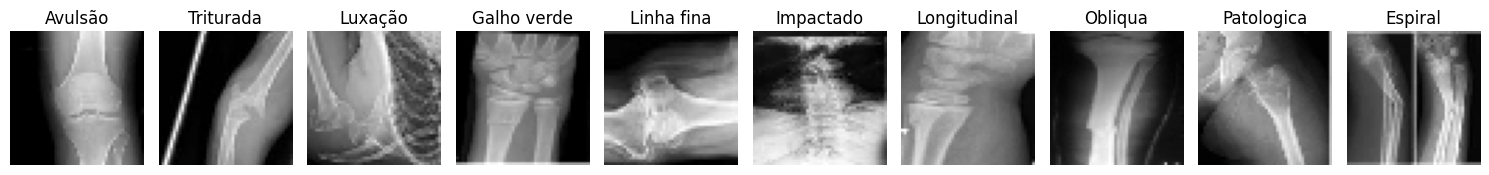

In [8]:
import matplotlib.pyplot as plt

classes = ['Avulsão', 'Triturada', 'Luxação', 'Galho verde', 'Linha fina', 'Impactado', 'Longitudinal', 'Obliqua', 'Patologica', 'Espiral']

# Dicionário para armazenar o índice da primeira imagem de cada classe
first_image_index = {}

# Encontra o índice da primeira imagem de cada classe
for i, label in enumerate(y_dataset):
    if label not in first_image_index:
        first_image_index[label] = i

# Configura a grade para exibir as imagens
num_classes = len(set(y_dataset))
num_images_per_class = 1
num_cols = num_classes
num_rows = num_images_per_class

# Cria uma figura com uma grade de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Loop através de cada classe
for i in range(num_classes):
    # Obtém o índice da primeira imagem da classe
    idx = first_image_index[i]

    # Obtém a imagem e converte para RGB
    pixels = dataset[idx].reshape(image_height, image_width)

    # Exibe a imagem no subplot correspondente
    axes[i].imshow(pixels, cmap='gray')
    axes[i].axis('off')

    # Adiciona um título para o subplot com o rótulo
    axes[i].set_title(f'{classes[i]}')

# Exibe a figura
plt.tight_layout()
plt.show()

6. NORMALIZANDO O DATASET

In [9]:
# categorical values
n_classes = len(set(y_dataset))
print(n_classes)

y_dataset_ = to_categorical(y_dataset, n_classes)

10


In [10]:
# Trim dataset to match the size of y_dataset_
dataset_trimmed = dataset[:len(y_dataset_)]

# Now both dataset_trimmed and y_dataset_ have the same size
# You can then proceed with splitting or any other operations

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_trimmed, y_dataset_, test_size=0.2)

print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 791, Test set size: 198


In [11]:
from sklearn.utils import resample

# Criar listas vazias para armazenar as amostras balanceadas
balanced_X_train = []
balanced_y_train = []

# Determinar o número de amostras na classe majoritária
majority_samples = 7000

# Iterar sobre cada classe
for class_label in np.unique(y_train.argmax(axis=1)):
    # Filtrar amostras pertencentes a essa classe
    X_class = X_train[y_train.argmax(axis=1) == class_label]
    y_class = y_train[y_train.argmax(axis=1) == class_label]

    # Calcular o número de amostras na classe menos representada
    minority_samples = len(X_class)

    # Balancear as amostras aumentando a classe menos representada
    balanced_X_class, balanced_y_class = resample(X_class, y_class,
                                                  replace=True,
                                                  n_samples=majority_samples,
                                                  random_state=42)

    # Adicionar amostras balanceadas à lista
    balanced_X_train.extend(balanced_X_class)
    balanced_y_train.extend(balanced_y_class)

# Converter listas em arrays numpy
balanced_X_train = np.array(balanced_X_train)
balanced_y_train = np.array(balanced_y_train)

# Embaralhar amostras
shuffled_indices = np.arange(len(balanced_X_train))
np.random.shuffle(shuffled_indices)
balanced_X_train = balanced_X_train[shuffled_indices]
balanced_y_train = balanced_y_train[shuffled_indices]

# Verificar o tamanho dos conjuntos de dados balanceados
print("Tamanho do conjunto de treinamento balanceado:", len(balanced_X_train))
print("Tamanho do conjunto de teste:", len(X_test))

for class_label in np.unique(balanced_y_train.argmax(axis=1)):
    count = np.sum(balanced_y_train.argmax(axis=1) == class_label)
    print(f"Classe {class_label}: {count} amostras")

Tamanho do conjunto de treinamento balanceado: 70000
Tamanho do conjunto de teste: 198
Classe 0: 7000 amostras
Classe 1: 7000 amostras
Classe 2: 7000 amostras
Classe 3: 7000 amostras
Classe 4: 7000 amostras
Classe 5: 7000 amostras
Classe 6: 7000 amostras
Classe 7: 7000 amostras
Classe 8: 7000 amostras
Classe 9: 7000 amostras


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization

# Criar o modelo
model = Sequential()

model.add(BatchNormalization(input_shape=(image_height, image_width, 1)))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))  # Adiciona a camada de dropout

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))  # Adiciona a camada de dropout

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adiciona a camada de dropout
model.add(Dense(10, activation='softmax'))  # Especifica 'softmax' como a função de ativação

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 48, 48, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 512)         │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,179,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,365,038 (9.02 MB)

 Trainable params: 2,365,036 (9.02 MB)

 Non-trainable params: 2 (8.00 B)

4.COMPILANDO O MODELO

In [13]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Treinando o modelo
from tensorflow.keras.callbacks import EarlyStopping

# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Treinar o modelo
history = model.fit(balanced_X_train, balanced_y_train,validation_split= 0.2, epochs=100, callbacks=[early_stopping], batch_size=64)


Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 76s 73ms/step - accuracy: 0.3132 - loss: 1.8436 - val_accuracy: 0.8456 - val_loss: 0.5385
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.6668 - loss: 0.8913 - val_accuracy: 0.9499 - val_loss: 0.2584
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.7449 - loss: 0.6952 - val_accuracy: 0.9689 - val_loss: 0.1748
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.7876 - loss: 0.5815 - val_accuracy: 0.9782 - val_loss: 0.1294
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.8138 - loss: 0.4953 - val_accuracy: 0.9834 - val_loss: 0.0956
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8310 - loss: 0.4488 - val_accuracy: 0.9947 - val_loss: 0.0727
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8552 - loss: 0.3966 - val_accuracy: 0.9898 - val_loss: 0.0487
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8705 - loss: 0

In [15]:
val_accuracy = history.history['val_accuracy']

mean_val_accuracy = np.mean(val_accuracy)

print("Valor médio de acurácia:", mean_val_accuracy)

Valor médio de acurácia: 0.9958350044488907


5. CARREGANDO O MODELO

In [16]:
import pandas as pd
history_save = pd.DataFrame(history.history)
history_save.to_csv('datasetNormal.csv')

In [17]:
# save model structure in jason file
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
model.save('modelosalvo.keras')

In [19]:
from keras.models import load_model

modelo_carregado = load_model('/content/modelosalvo.keras')

In [20]:
import pandas as pd

history = pd.read_csv('/content/datasetNormal.csv')

5. PLOTANDO O MODELO

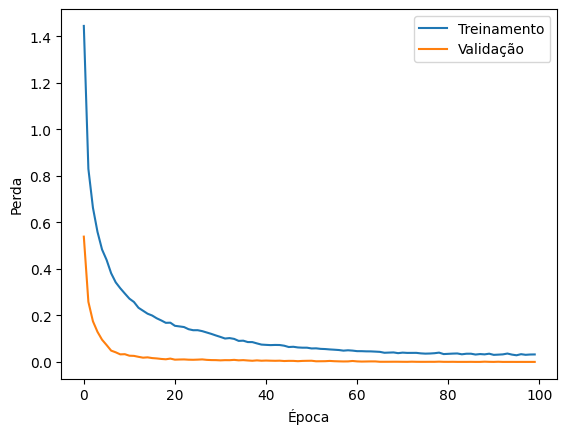

In [21]:
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])


plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc = 'upper right')
plt.show()


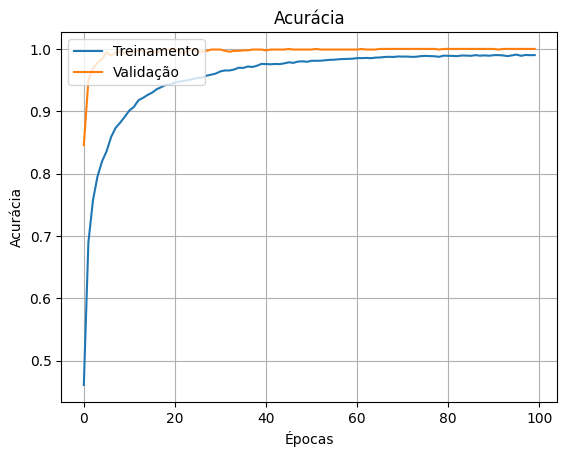

In [22]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.grid(True)
plt.show()
plt.close()

5. SALVANDO O MODELO

In [23]:
preds = modelo_carregado.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step


In [24]:
#Função da Matriz de Confusão

def plot_confusion_matrix(
        cm,
        classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues
    ):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')

Confusion matrix, without normalization
[[ 8  3  2  1  0  1  0  1  2  2]
 [ 2 15  4  1  1  1  2  1  2  1]
 [ 2  6 12  5  3  0  2  1  4  0]
 [ 2  3  3  6  1  0  1  3  0  1]
 [ 0  3  3  0  3  1  0  0  2  0]
 [ 0  2  3  1  1  7  3  0  0  1]
 [ 0  2  3  1  3  0  3  0  0  1]
 [ 1  4  0  2  2  1  2  1  0  1]
 [ 2  3  3  1  1  0  0  0 11  0]
 [ 1  0  0  0  0  1  1  2  3  7]]


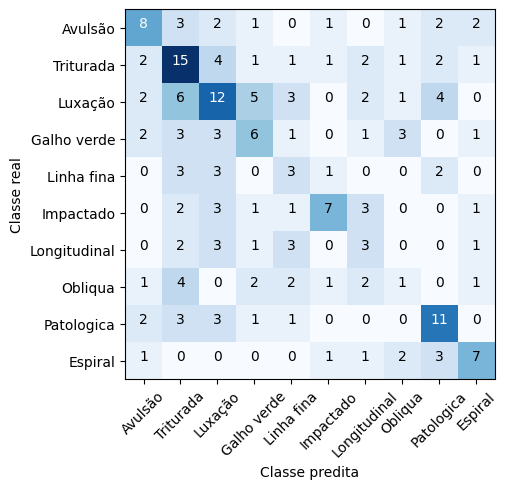

In [28]:
#Gráfico da Matriz de Confusão

y_test_ = [np.argmax(x) for x in y_test]
preds_ = [np.argmax(x) for x in preds]

cm = confusion_matrix(y_test_, preds_)
plot_confusion_matrix(cm, classes=['Avulsão', 'Triturada', 'Luxação', 'Galho verde', 'Linha fina', 'Impactado', 'Longitudinal', 'Obliqua', 'Patologica', 'Espiral'], title='Confusion matrix')
plt.show()
plt.close()

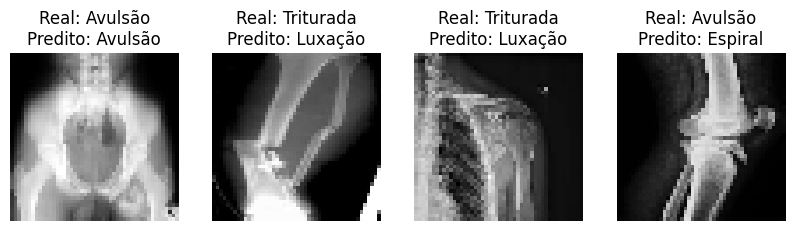

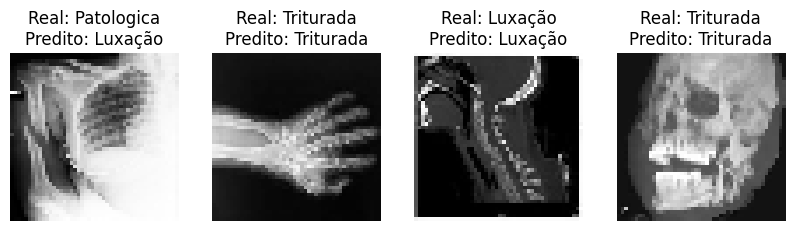

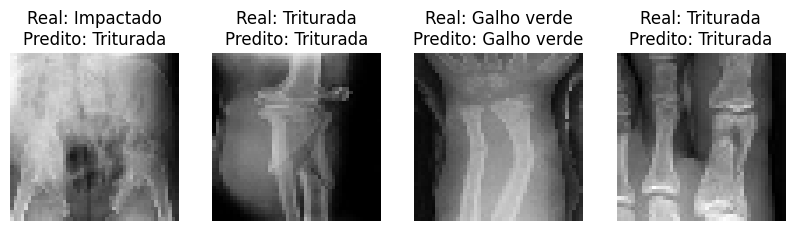

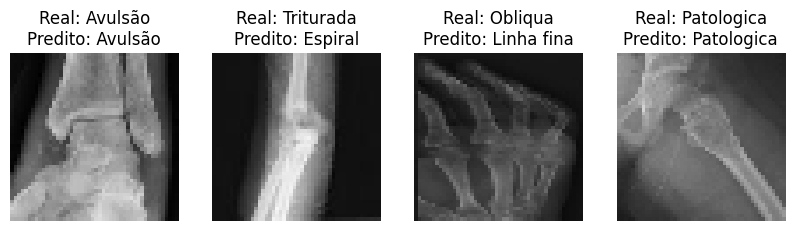

In [27]:
#Resultado das predições

n = 4
for t in range(4):
    plt.figure(figsize=(10,10))
    for i in range(n*t, n*(t+1)):
        plt.subplot(1, n, i + 1 - n*t)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title('Real: {}\nPredito: {}'.format(classes[np.argmax(y_test[i])], classes[np.argmax(preds[i])]))
        plt.axis('off')
    plt.show()